In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt
print(pd.__version__)
import progressbar
import os

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [24]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py,progressbar,scipy,os

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

pandas     : 1.2.0
keras      : 2.4.3
numpy      : 1.19.5
math       : unknown
tensorflow : 2.4.0
matplotlib : 3.3.3
h5py       : 2.10.0
progressbar: 2.5
scipy      : 1.6.0
os         : unknown

Compiler    : GCC 5.4.0 20160609
OS          : Linux
Release     : 5.8.0-41-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Tue Feb 02 2021 18:52:49CET



### Load of the test data

- 100
- 250
- 100-high-ene

In [2]:
n = input('Which file do you want?')

Which file do you want?100-high-ene


In [3]:
from process import loaddata
regr_data = loaddata("../data/regression/{}.csv".format(n))
class_data = loaddata("../data/classifier/{}.csv".format(n))

In [4]:
np.random.shuffle(class_data)
yc_test = class_data[:,0]
xc_test = class_data[:,1:]
xc_test.shape

(72254, 10)

In [5]:
np.random.shuffle(regr_data)
yr_test = regr_data[:,-3:]
xr_test = regr_data[:,:6]

### Model Load

In [6]:
from tensorflow import keras 

In [7]:
model_regr = keras.models.load_model('../models/regression/large_mse.h5')
model_class = keras.models.load_model('../models/classifier/with-dropout-250.h5')

### Test of the Classification NN
(if you want to run this just code these cells)

model_class.fit(xc_test, yc_test)

### Test of the Regression NN

model_regr.fit(xr_test, yr_test)

### Test spectrum

In [8]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step')
    plt.yscale("log")
    plt.show()

In [9]:
final_p = []
final_e = []

for regr_pair in regr_data:
    final_e.append(np.linalg.norm(regr_pair[10:13]))
    final_p.append(np.linalg.norm(regr_pair[13:16]))

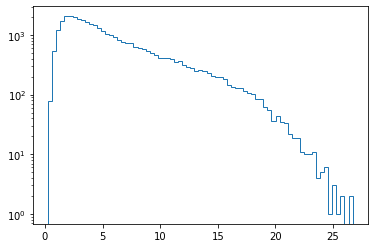

In [10]:
energy_spectrum(final_e, 75)

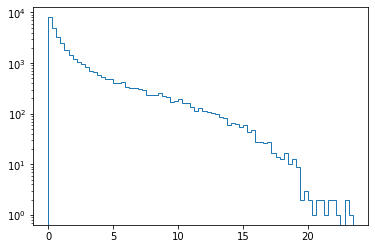

In [11]:
energy_spectrum(final_p, 75)

In [12]:
y = []
pred = []

y = model_class.predict(xc_test)
data = np.hstack((y, xc_test))
data = data[np.logical_not(data[:,0] < 0.5)]
pred = model_regr.predict(data[:,1:7])

In [13]:
data[0]

array([  1.        , -12.39930344, -15.08603191,   3.02371645,
        -6.83913803,   3.22558284,  -8.21126938,   0.21540351,
         2.54670429,   0.2659072 ,   2.45075417])

In [14]:
print(data.shape)
print(xc_test.shape)

(67803, 11)
(72254, 10)


In [15]:
final_p_nn = []
for pred_ in pred:
    final_p_nn.append(np.linalg.norm(pred_))

In [16]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

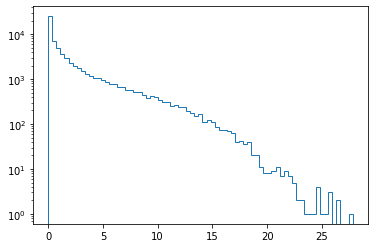

In [17]:
energy_spectrum(final_p_nn, 75)

In [18]:
os.system('mkdir ../plots/{}'.format(n))

256

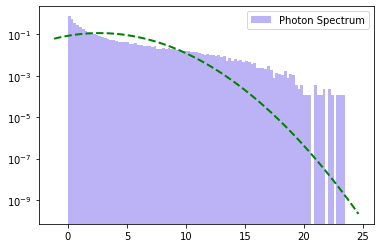

In [19]:
mean,std=norm.fit(final_p)
plt.hist(final_p, bins=100, alpha = 0.5, color = 'mediumslateblue', label='Photon Spectrum', density = True)
plt.legend(loc='upper right')
xmin, xmax = plt.xlim()
x_p = np.linspace(xmin, xmax, 100)
y_p = norm.pdf(x_p, mean, std)
plt.plot(x_p, y_p,'g--', linewidth=2)
plt.yscale('log')
plt.savefig('../plots/{}/photonspectrum.png'.format(n))
plt.savefig('../plots/{}/photonspectrum.png'.format(n))
plt.show()

In [20]:
print('mean = ', mean)
print('std = ', std)
print("chi square = ", stats.chisquare(final_p))

mean =  2.6805728791669874
std =  3.4600035803779385
chi square =  Power_divergenceResult(statistic=161345.69280026347, pvalue=0.0)


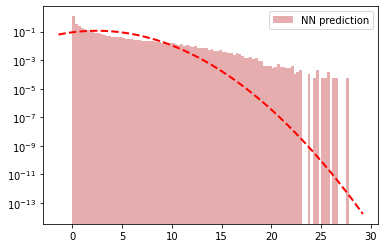

In [21]:
mean_nn,std_nn=norm.fit(final_p_nn)
plt.hist(final_p_nn, bins=100, alpha = 0.5,  color = 'indianred', label='NN prediction', density = True)
xmin, xmax = plt.xlim()
x_nn = np.linspace(xmin, xmax, 100)
y_nn = norm.pdf(x_nn, mean_nn, std_nn)
plt.plot(x_nn, y_nn,'r--', linewidth=2)
plt.yscale('log')
plt.legend(loc='upper right')
plt.savefig('../plots/{}/NNprediction.png'.format(n))
plt.savefig('../plots/{}/NNprediction.pdf'.format(n))
plt.show()

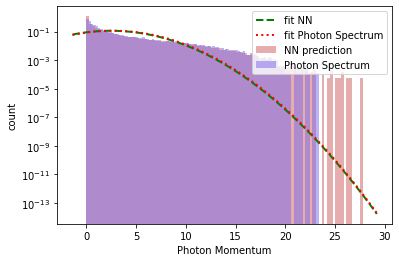

In [22]:
plt.hist(final_p_nn, 100, alpha=0.5, color = 'indianred', label='NN prediction', density = True)
plt.hist(final_p, 100, alpha=0.5, color = 'mediumslateblue', label='Photon Spectrum', density = True)
plt.xlabel('Photon Momentum')
plt.ylabel('count')
plt.legend(loc='upper right')
x_nn = np.linspace(xmin, xmax, 100)
y_nn = norm.pdf(x_nn, mean_nn, std_nn)
plt.plot(x_nn, y_nn,'g--', label = 'fit NN', linewidth = 2)
plt.legend(loc='upper right')
x_p = np.linspace(xmin, xmax, 100)
y_p = norm.pdf(x_p, mean, std)
plt.plot(x_p, y_p, 'r:', label = 'fit Photon Spectrum', linewidth = 2)
plt.yscale('log')
plt.legend(loc = 'upper right')
plt.savefig('../plots/{}/comparison.png'.format(n))
plt.savefig('../plots/{}/comparison.pdf'.format(n))
plt.show()

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


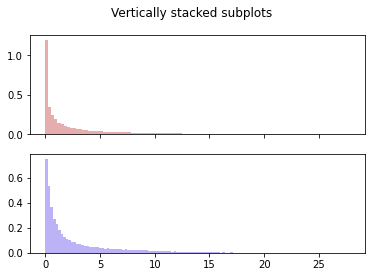

In [23]:
fig, axs = plt.subplots(2, sharex = True)
fig.suptitle('Vertically stacked subplots')
axs[0].hist(final_p_nn, 100, alpha=0.5, color = 'indianred', label='NN prediction', density = True)
axs[1].hist(final_p, 100, alpha=0.5, color = 'mediumslateblue', label='Photon Spectrum', density = True)
fig.show()